In [100]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [165]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        #momento angular
        self.l = np.cross(self.r,self.p)
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
        #momento angular
        self.L = np.zeros(len(t))
        
        
        # Fisica
        self.sigma = 1.5*self.radius
        
        self.epsilon = 1500
        
        self.VEk = np.zeros(len(t))
        self.Ep = 0.
        self.VEp = np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
       # self.r += self.dt*self.v
       # self.v += self.dt*self.a
        
        self.SetPotentialEnergy(i)
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        Fn = 4*self.epsilon*( 12*self.sigma**12/d**13 - 6*self.sigma**6/d**7  )
        
        self.n = (self.r - p.r)/d     
        
        self.f = np.add(self.f,Fn*self.n)
        
        # Falta implementar energía potencial 
        self.Ep += 4*self.epsilon*( self.sigma**12/d**12 - self.sigma**6/d**6  )
        
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        if len(self.v)<=2:
            self.L[i] = np.cross(self.r,self.p)
        else:
            self.L[i] = 0
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    
    def SetPotentialEnergy(self,i):
        self.VEp[i] = self.Ep
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.VEp[::scale]
    #momento angular
    
    def GetAngularMomentum(self, scale=1):
        return self.L[::scale]
    
    #walls
        '''
        if compresion_wall1 >= 0:
            
            Fn = self.K * compresion_wall1**3
            
            self.n = (self.r - 20)/dwall1   
            self.f = np.add(self.f,Fn*self.n)
         #paredes
        if compresion_wall2>=0:
            Fn = self.K * compresion_wall2**3
            
            self.n = (self.r - (-20))/dwall2     
            self.f = np.add(self.f,Fn*self.n)   
        '''
    '''
    def CalculateWallForce(self, wall_limits):
        #Calcula la fuerza ejercida por las paredes en la partícula.
        xmin, xmax, ymin, ymax = wall_limits
        #pared izquierda
        if self.r[0] - self.radius < xmin:
            self.f[0] += self.K * (self.radius - (self.r[0] - xmin)) ** 3
        #pared derecha
        elif self.r[0] + self.radius > xmax:
            self.f[0] -= self.K * (self.radius - (xmax - self.r[0])) ** 3
        #pared abajo
        if self.r[1] - self.radius < ymin:
            self.f[1] += self.K * (self.radius - (self.r[1] - ymin)) ** 3
        #pared arriba
        elif self.r[1] + self.radius > ymax:
            self.f[1] -= self.K * (self.radius - (ymax - self.r[1])) ** 3
        
    '''
    # Aca debes agregar la energía potencial

In [166]:
def GetParticles(N,t):
    limites_mesa=[-20,20]
    limites_vel=[-5,5]
    a0 = np.array([0.,0.])
    '''
    r0 = np.array([-5.,0.])
    v0 = np.array([10.,0])
  
    
    r1 = np.array([0.,0.])
    v1 = np.array([0.,0.])
    a1 = np.array([0.,0.])
    
    r2 = np.array([4.,0.])
    v2 = np.array([0.,0.])
    a2 = np.array([0.,0.])
    '''
    #aletoriedad de velocidades y posicion en la mesa con los limites en cuenta
    
    Particles=np.array([])
    for i in range(N):
        v_=np.array([np.random.uniform(limites_vel[0],limites_vel[1]),np.random.uniform(limites_vel[0],limites_vel[1])])
        r_=np.array([np.random.uniform(limites_mesa[0],limites_mesa[1]),np.random.uniform(limites_mesa[0],limites_mesa[1])])
        p_=[Particle(r_,v_,a0,t,m=1,radius=2,Id=i)]
        Particles=np.concatenate((Particles,p_))
                                       
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [167]:
dt =  0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(10,t)

In [168]:
def RunSimulation(t,Particles):
    wall_limits=[-20,20,-20,20]
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
               
                #Particles[i].CalculateWallForce(wall_limits)
                #Particles[j].CalculateWallForce(wall_limits)
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [169]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|███████████████████████████████████████████████████| 10000/10000 [00:16<00:00, 595.27 Steps/s]


In [170]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


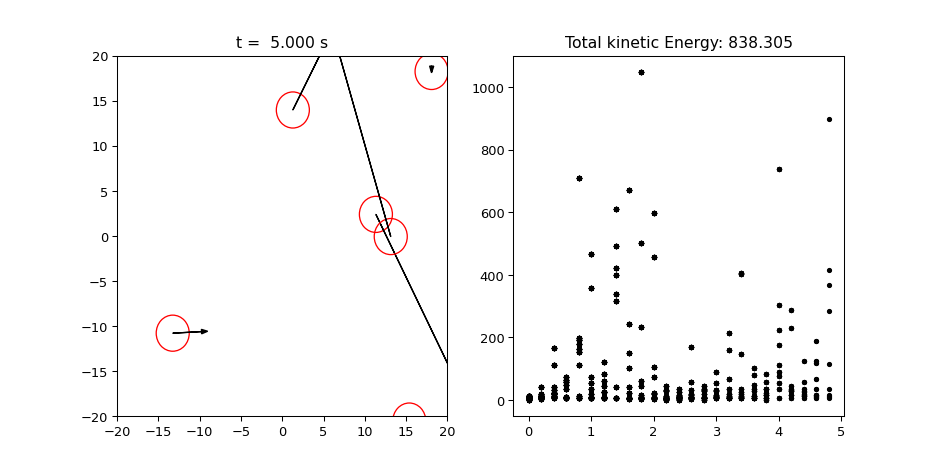

In [171]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [172]:
MomentumT = Particles[0].GetMomentum(scale)
MomentumL = Particles[0].GetAngularMomentum(scale)

EnergyT = Particles[0].GetKineticEnergy(scale)

EnergyP = Particles[0].GetPotentialEnergy(scale)

In [173]:
EnergyP *= 0.5

In [174]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))
    MomentumL = np.add(MomentumL,Particles[i].GetAngularMomentum(scale))
    EnergyT = np.add(EnergyT,Particles[i].GetKineticEnergy(scale))
    EnergyP = np.add(EnergyP,Particles[i].GetPotentialEnergy(scale))

<IPython.core.display.Javascript object>


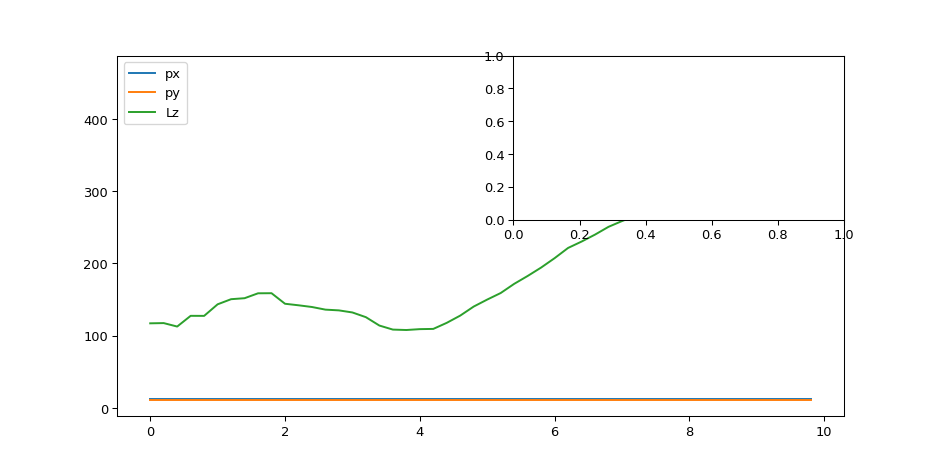

In [175]:
fig3 = plt.figure(figsize=(10,5))
#ax3 = fig3.add_subplot(221)
#ax4 = fig3.add_subplot(222)
plt.plot(t1,MomentumT[:,0],label='px')
plt.plot(t1,MomentumT[:,1],label='py')
plt.plot(t1,MomentumL,label='Lz')
plt.legend()
#print(MomentumL)

<IPython.core.display.Javascript object>


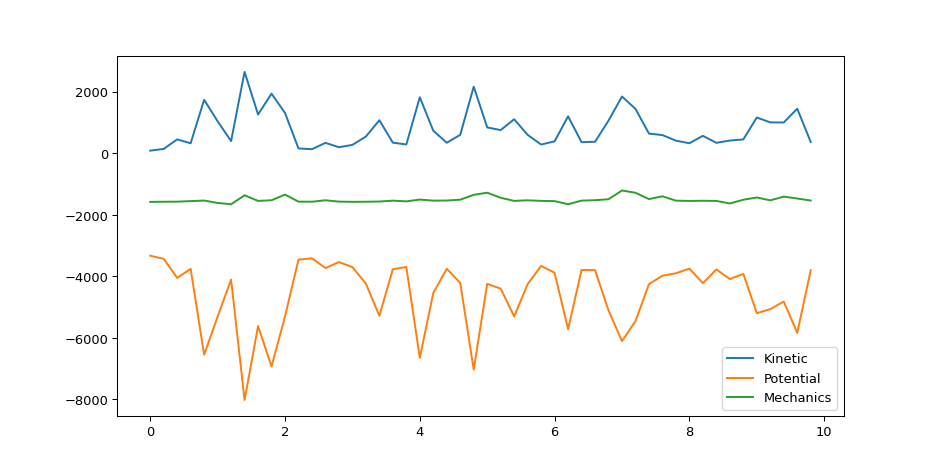

In [176]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig3.add_subplot(222)
plt.plot(t1,EnergyT,label='Kinetic')
plt.plot(t1,EnergyP,label='Potential')
plt.plot(t1,EnergyT+0.5*EnergyP,label='Mechanics')
plt.legend()

# Parte 3D

In [206]:
def GetParticles3d(N,t):
    limites_mesa=[-20,20]
    limites_vel=[-5,5]
    a0 = np.array([0.,0.,0.])
    '''
    r0 = np.array([-5.,0.])
    v0 = np.array([10.,0])
  
    
    r1 = np.array([0.,0.])
    v1 = np.array([0.,0.])
    a1 = np.array([0.,0.])
    
    r2 = np.array([4.,0.])
    v2 = np.array([0.,0.])
    a2 = np.array([0.,0.])
    '''
    #aletoriedad de velocidades y posicion en la mesa con los limites en cuenta
    
    Particles=np.array([])
    for i in range(N):
        #v_=np.array([np.random.uniform(limites_vel[0],limites_vel[1]),np.random.uniform(limites_vel[0],limites_vel[1]),np.random.uniform(limites_vel[0],limites_vel[1])])
        v_=np.array([np.random.uniform(limites_vel[0],limites_vel[1]),np.random.uniform(limites_vel[0],limites_vel[1]),0])
        #r_=np.array([np.random.uniform(limites_mesa[0],limites_mesa[1]),np.random.uniform(limites_mesa[0],limites_mesa[1]),np.random.uniform(limites_mesa[0],limites_mesa[1])])
        r_=np.array([np.random.uniform(limites_mesa[0],limites_mesa[1]),np.random.uniform(limites_mesa[0],limites_mesa[1]),0])
        p_=[Particle(r_,v_,a0,t,m=1,radius=2,Id=i)]
        Particles=np.concatenate((Particles,p_))
                                       
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [207]:
dt =  0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles3d = GetParticles3d(10,t)

In [208]:
def RunSimulation(t,Particles):
    wall_limits=[-20,20,-20,20]
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
               
                #Particles[i].CalculateWallForce(wall_limits)
                #Particles[j].CalculateWallForce(wall_limits)
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [209]:
Particles3d = RunSimulation(t,Particles3d)

Running simulation: 100%|███████████████████████████████████████████████████| 10000/10000 [00:17<00:00, 587.86 Steps/s]


In [210]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


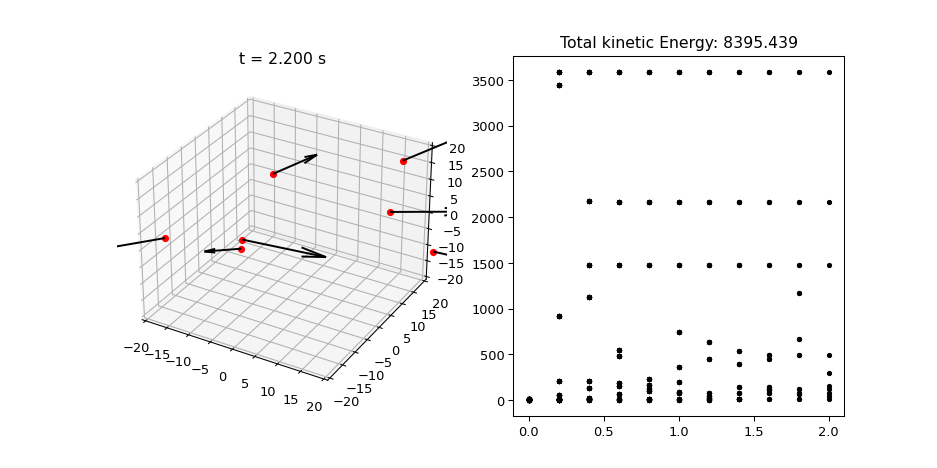

In [217]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121,projection='3d')
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_zlim(-20, 20)

    ax.set_title('t = {:.3f} s'.format(t1[0]))
def Update(i):
    
    init()
    #ax.set_title(r't =  %.3f s' %(t1[i]))
    ax.set_title('t = {:.3f} s'.format(t1[i]))
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles3d:
        
        x = p.GetPosition(scale)[i, 0]
        y = p.GetPosition(scale)[i, 1]
        z = p.GetPosition(scale)[i, 2]
        
        vx = p.GetVelocity(scale)[i, 0]
        vy = p.GetVelocity(scale)[i, 1]
        vz = p.GetVelocity(scale)[i, 2]
        
        ax.scatter(x, y, z, color='r', marker='o')  # Graficar la partícula
        
        ax.quiver(x, y, z, vx, vy, vz, color='k')  # Graficar la flecha de velocidad
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [212]:
Momentum_T = Particles3d[0].GetMomentum(scale)
Momentum_L = Particles3d[0].GetAngularMomentum(scale)

Energy_T = Particles3d[0].GetKineticEnergy(scale)

Energy_P = Particles3d[0].GetPotentialEnergy(scale)

In [213]:
Energy_P *= 0.5

In [214]:
for i in range(1,len(Particles)):
    Momentum_T = np.add(Momentum_T,Particles3d[i].GetMomentum(scale))
    Momentum_L = np.add(Momentum_L,Particles3d[i].GetAngularMomentum(scale))
    Energy_T = np.add(Energy_T,Particles3d[i].GetKineticEnergy(scale))
    Energy_P = np.add(Energy_P,Particles3d[i].GetPotentialEnergy(scale))

<IPython.core.display.Javascript object>


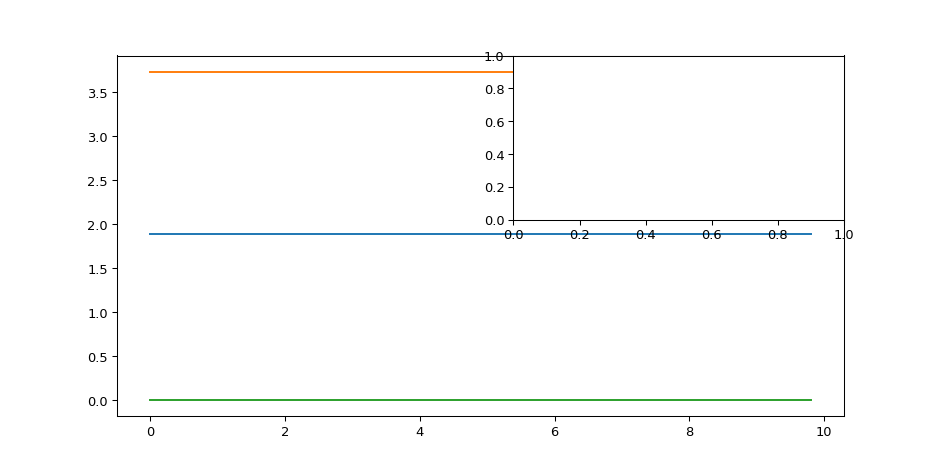

[256.59687967 257.18790541 248.10344165 274.28169925 269.53738531
 294.7949575  305.78094962 308.9905153  313.7395192  310.86219184
 285.22458642 271.2977423  263.20556974 257.64178182 250.30959465
 241.19619787 228.01981536 206.41669549 190.29263587 180.70215799
 176.80719714 186.8993147  207.9561877  230.93264456 257.0660062
 275.61628832 297.21739082 323.89067101 345.24654789 366.79224428
 390.24818702 415.81065745 431.11709431 449.12893545 470.87201354
 489.16135785 504.76090083 524.62351352 549.62033059 558.53798553
 571.89795581 596.15800302 636.74929916 687.5846135  718.071569
 763.82493356 803.49371023 844.09412143 891.80015019 929.96844679]


In [215]:
fig3 = plt.figure(figsize=(10,5))
#ax3 = fig3.add_subplot(221)
#ax4 = fig3.add_subplot(222)
plt.plot(t1,Momentum_T[:,0],label='px')
plt.plot(t1,Momentum_T[:,1],label='py')
plt.plot(t1,Momentum_T[:,2],label='pz')
#plt.plot(t1,Momentum_L,label='Lz')
plt.legend()
print(MomentumL)

<IPython.core.display.Javascript object>


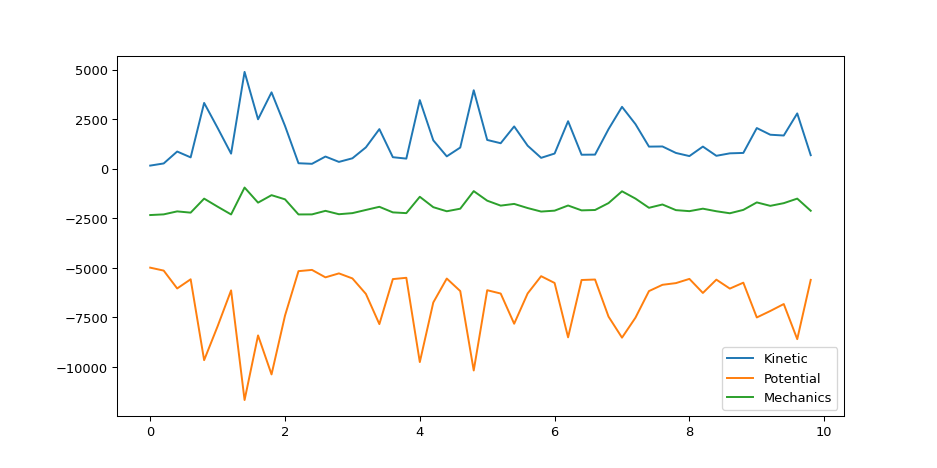

In [216]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig3.add_subplot(222)
plt.plot(t1,EnergyT,label='Kinetic')
plt.plot(t1,EnergyP,label='Potential')
plt.plot(t1,EnergyT+0.5*EnergyP,label='Mechanics')
plt.legend()

## PREGUNTAS

a, b) Como puede notarse el momento lineal total en x se conserva, lo cual tiene sentido dado que se trata de un sistema cerrado; lo mismo sucede en el eje y, donde también el momento lineal total se conserva por la misma razón.

d, e, f) Dado que la energía cinética se transforma en energía potencial a lo largo del tiempo, y viceversa, como tal estás no se conservan; sin embargo, como puede notarse la energía mecánica total, que es la suma de las dos sí se conserva. Un potencial positivo implicaría que la distancia de equilibrio es superada por la distancia de las partículas, es decir, sigma, donde el potencial es cero. Retomando la idea de que la energía mecánica total, aunque esta se conserva en las gráficas puede notarse ciertas perturbaciones, y es que a nivel físico se conoce que esta va a ser constante a lo largo del tiempo; no obstante, el método de integración utilizado: Euler, es limitado, lo cual hace que aparezcan las perturbaciones.

h) Como puede notarse en la gráfica 2D, el momento angular total no se conserva, lo cual puede estar relacionado con los torques debido a la interacción del potencial de Lennard.

i) Como se puede observar en la simulación 3d, las particulas se moverán en todo el volumen, pese a que sus valores en el eje Z para la velocidad y posicion iniciaron en cero.




# Punto 3
si $c=3×10^8 \frac{m}{s}$ entonces para pasarlo a au/año se procede así:

-Recordar $au=1.496×10^{11}$ m y $año=86400 s\cdot365= 31536000$

De esta manera: $ 3×10^8 \frac{m}{s} \cdot \frac{1au}{1.496×10^{11}m} \cdot 31536000\frac{s}{1año}= 70459.9 \frac{au}{año}$